In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from scipy.stats import ks_2samp
from scipy.stats import spearmanr

from utilsPlots import *


In [2]:
datadir = Path('../../published_data/export_2024-09-09')

figdir = Path('./figs')
figdir.mkdir(exist_ok=True, parents=True)


In [3]:
df_info = pd.read_csv(datadir / 'participant_info.csv')
df_feat = pd.read_csv(datadir / 'video_features.csv')
df_all = df_info.merge(df_feat, on=['ID', 'day'])


*	p=0.02672 Brooke=4
*	p=0.03885 Brooke=5
	p=0.26482 Brooke=6


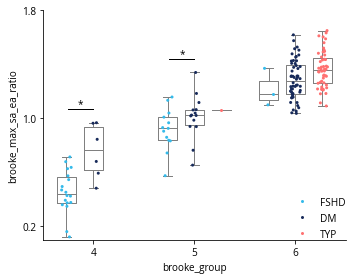

In [4]:
feat = 'brooke_max_sa_ea_ratio'

df = df_all[df_all.brooke_score >= 4].copy()
df['brooke_group'] = df.brooke_score.apply(lambda x : f'{int(x)}')

plt.figure(figsize=(5,4))
sns.boxplot(df, x='brooke_group', y=feat, hue='type', dodge=True, gap=0.3, width=0.8,
              hue_order=['FSHD', 'DM', 'TYP'], linewidth=1, whis=[0, 100],
              order=['4', '5', '6'],
              palette=['#808080']*3, saturation=1, fill=None,  legend=False)
np.random.seed(0)
sns.stripplot(df, x='brooke_group', y=feat, hue='type', dodge=True, size=3,
              hue_order=['FSHD', 'DM', 'TYP'], jitter=0.15,
              palette=[cp[3], cp[0], cp[1]], alpha=1)
plt.yticks([0.2, 1.0, 1.8])
plt.ylim(0.1, 1.8)


pvals = []
for group in ['4', '5', '6']:
    df_temp = df[df.brooke_group == group]
    df_temp = df_temp.dropna(subset=feat)

    pval = ks_2samp(
        df_temp[df_temp.type=='FSHD'][feat],
        df_temp[df_temp.type=='DM'][feat],
        alternative='greater',
    ).pvalue
    pvals.append(pval)


for i, group in enumerate(['4', '5', '6']):
    pval = pvals[i]
    if pval < 0.001:
        stars = '***'
    elif pval < 0.01:
        stars = '**'
    elif pval < 0.05:
        stars = '*'
    else:
        stars = ''
    print(f'{stars}\tp={pval:0.5f} Brooke={group}')

    if stars:
        y = df[df.brooke_group==group][feat].max() + 0.1
        plt.plot([i-0.25, i], [y,y], c='k', lw=1)
        plt.text(i-0.125, y, stars, ha='center', va='bottom')

plt.tight_layout()
plt.legend(loc='lower right', frameon=False, borderpad=0, borderaxespad=0)
plt.savefig(figdir/'fig6_brooke.pdf')
plt.show()


In [5]:
res = spearmanr(df_all['brooke_max_sa_ea_ratio'], df_all['brooke_score'])
print('spearman r =', res.statistic, ', p =', res.pvalue)


spearman r = 0.794757422538102 , p = 1.582248016292475e-36
